# Logistic Regression

## Exercise 1: Loading the Data

For today's exercise we will use the **Breast Cancer Wisconsin (Diagnostic)**. It is a collection of data used for predicting whether a breast tumor is malignant (cancerous) or benign (non-cancerous), containinh information derived from images of breast mass samples obtained through fine needle aspirates.

The dataset consists of 569 samples with 30 features that measure various characteristics of cell nuclei, such as radius, texture, perimeter, and area. Each sample is labeled as either **malignant (1)** or **benign (0)**.

1. Please [visit the documentation](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) and familiarize yourself with the dataset.
2. Take an initial look at the features (predictors) and targets (outcomes) through the `.head()` method.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from ucimlrepo import fetch_ucirepo

# Fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# Data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets

# Convert y to a 1D array (this is the required input for the logistic regression model)
y = np.ravel(y)

# Print information 
print(breast_cancer_wisconsin_diagnostic.variables)
print(X.head())
print(y)

                  name     role         type demographic description units  \
0                   ID       ID  Categorical        None        None  None   
1            Diagnosis   Target  Categorical        None        None  None   
2              radius1  Feature   Continuous        None        None  None   
3             texture1  Feature   Continuous        None        None  None   
4           perimeter1  Feature   Continuous        None        None  None   
5                area1  Feature   Continuous        None        None  None   
6          smoothness1  Feature   Continuous        None        None  None   
7         compactness1  Feature   Continuous        None        None  None   
8           concavity1  Feature   Continuous        None        None  None   
9      concave_points1  Feature   Continuous        None        None  None   
10           symmetry1  Feature   Continuous        None        None  None   
11  fractal_dimension1  Feature   Continuous        None        

## Exercise 2: Fitting the prediction model

1. Fit a logitic regression model using all predictors for predicting
2. Get and print the accuracy of the model.
3. Get and print the confusion matrix for the target variable.
4. Review the classification report and interpret the results.

*Hint: If you get a warning about convergence, try setting `max_iter=10000` in the logistic regression class.*

In [52]:
model = LogisticRegression(max_iter=10000)
results = model.fit(X, y)

# Get the intercept and coefficients
intercept = results.intercept_
coef = results.coef_

print("Intercept:", intercept)
print("Coefficients:", coef)

# Evaluate the model using predictions
print("Model accuracy:", model.score(X, y))

# Confusion Matrix
conf = confusion_matrix(y, model.predict(X))
print("Confusion matrix:\n", conf)

#classification report
from sklearn.metrics import classification_report
report = classification_report(y, model.predict(X))
print(report)

Intercept: [-27.95056684]
Coefficients: [[-1.01649102 -0.1801684   0.27565655 -0.0226662   0.1788688   0.22074883
   0.53685545  0.29603555  0.26639959  0.03046789  0.07816283 -1.25532588
  -0.11582457  0.10854792  0.02539334 -0.06767259  0.03651147  0.03822884
   0.03627027 -0.0140333  -0.15086497  0.43624862  0.10562901  0.01380557
   0.35772193  0.68749004  1.4271106   0.60399598  0.72848145  0.09506939]]
Model accuracy: 0.9578207381370826
Confusion matrix:
 [[348   9]
 [ 15 197]]
              precision    recall  f1-score   support

           B       0.96      0.97      0.97       357
           M       0.96      0.93      0.94       212

    accuracy                           0.96       569
   macro avg       0.96      0.95      0.95       569
weighted avg       0.96      0.96      0.96       569



## Voluntary exercise

1. Try to create a custom plot which visualizes the confusion matrix It should contain:
    - The four squares of the matrix (color coded)
    - Labels of the actual values in the middle of each square
    - Labels for all squares
    - A colorbar
    - A title

2. Use `ConfusionMatrixDisplay()` from scikit-learn to achieve the same goal (and see that sometimes it makes sense to not re-invent the wheel :))

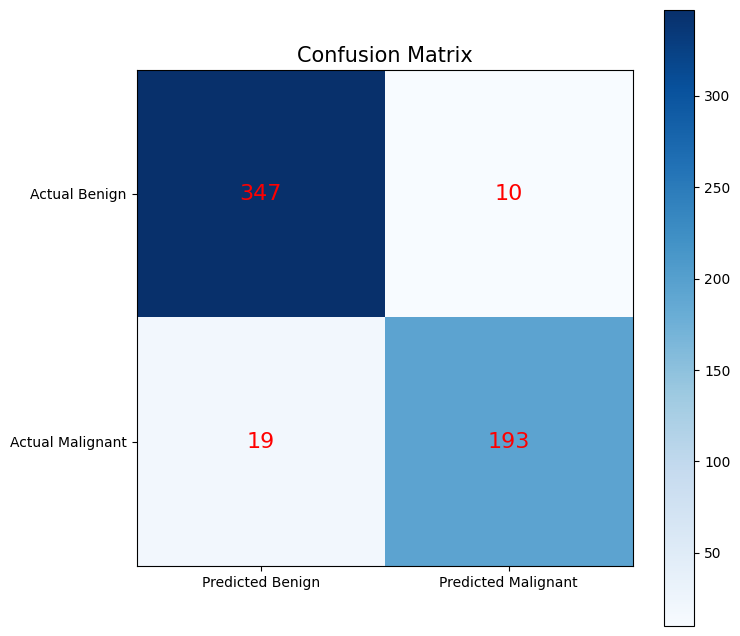

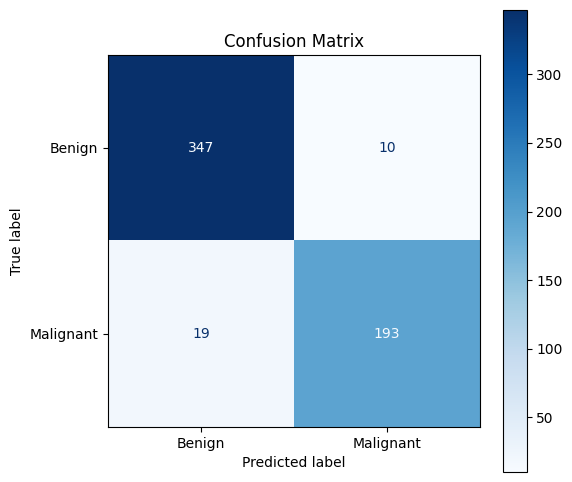

In [ ]:
# 1. Plot a custom confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
cax = ax.imshow(conf, cmap='Blues')

# labels
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Benign', 'Predicted Malignant'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Benign', 'Actual Malignant'))

# Annotate the confusion matrix
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf[i, j], ha='center', va='center', color='red', fontsize=16)

ax.set_title('Confusion Matrix', fontsize=15)

plt.colorbar(cax)
plt.show()

# 2. Using scikit-learn
from sklearn.metrics import ConfusionMatrixDisplay

# Display the confusion matrix using scikit-learn
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=conf,
                              display_labels=["Benign", "Malignant"])

disp.plot(cmap='Blues', ax=ax, colorbar=True)
plt.title("Confusion Matrix")
plt.show()